In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Gradient Descent Regression
from sklearn.linear_model import SGDRegressor
# Performs the z-score normalization
from sklearn.preprocessing import StandardScaler
from lab_utils_multi import load_house_data

In [2]:
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']

In [6]:
scaler = StandardScaler() # creates an instance of StandardScaler
X_norm = scaler.fit_transform(X_train) # fit computes the mean and standard deviation of each column in X_train
# transform applies the standardization formula to each column

# np.ptp stands for Peak-to-Peak. ptp=max(array)−min(array)
# a = np.array([1, 4, 7, 10])
# print(np.ptp(a)) 10 - 1 = 9

# X = np.array([[1, 2, 3],
#               [4, 5, 6],
#               [7, 8, 9]])

# np.ptp(X, axis=0)  # Column-wise peak-to-peak: [7-1, 8-2, 9-3] => [6, 6, 6]
# np.ptp(X, axis=1)  # Row-wise peak-to-peak: [3-1, 6-4, 9-7] => [2, 2, 2]

print(f"Peak to Peak range by column in Raw X: {np.ptp(X_train, axis=0)}")
print(f"Peak to Peak range by column in Normalized X: {np.ptp(X_norm, axis=0)}")

Peak to Peak range by column in Raw X: [2.406e+03 4.000e+00 1.000e+00 9.500e+01]
Peak to Peak range by column in Normalized X: [5.8452591  6.13529646 2.05626214 3.68533012]


In [8]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)
number of iterations completed: 127, number of weight updates: 12574.0


In [9]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

model parameters:                   w: [110.17133708 -21.06868224 -32.49318958 -38.02716973], b:[363.13877389]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


In [10]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")
print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[295.18421143 485.86551273 389.56625977 492.02775518]
Target values 
[300.  509.8 394.  540. ]


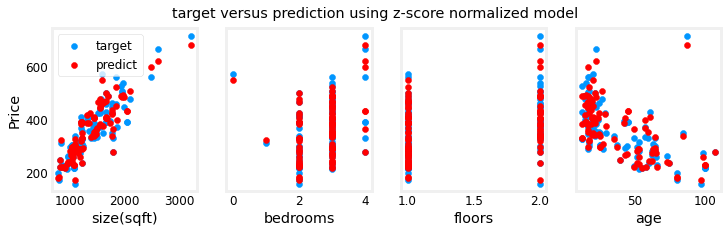

In [13]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color='r', label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()